# us-accidents-analysis



## US Accidents Exploratory data analysis

TO Do - Talk about the EDA
TO Do - Talk about the dataset( Source, what data it contains, how it will be useful)
  - Exploratory Data Analysis(EDA) is an approach to analyse the data,      to summarize its characteristics , often with visual methods. 
  - Kaggle
  - Information about the accidents
  - Can be useful to prevent 
  - Dataset does not contain data of New York city

In [ ]:
pip install opendatasets --upgrade --quiet

## Downloading the data 

In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [ ]:
data_filename = './us-accidents/US_Accidents_Dec20_updated.csv'

## Data Preperation and cleaning

1. Load the file using Pandas
2. Look the information provided in the data and columns
3. Fix any missing or incorrect values


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


## Exploratory analysis and visualization
 here we use the columns we need to analyze
1. city
2. start_time
3. start_lat
4. start_long 
5. Temp
6. Weather condition

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
len(df.columns)

47

In [ ]:
len(df)

1516064

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

# df.isna()  is used to find any missing values 
-- False - indicates not empty
-- True - indicates empty


In [ ]:
df.isna() 

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1516060,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1516061,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1516062,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
Missing_percentages = df.isna().sum().sort_values(ascending= False) / len(df)
Missing_percentages

# df.isna().sum() - counts the values missing per column

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
City                     0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
Civil_Twilight           0.000055
Sunrise_Sunset           0.000055
Amenity                  0.000000
Bump                     0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
End_Lat                  0.000000
End_Lng                  0.000000
Distance(mi)             0.000000
Description   

In [ ]:
type(Missing_percentages)

pandas.core.series.Series

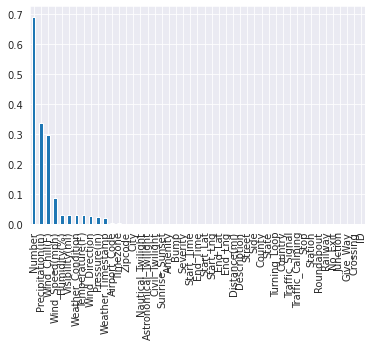

In [ ]:
Missing_percentages.plot(kind='bar')

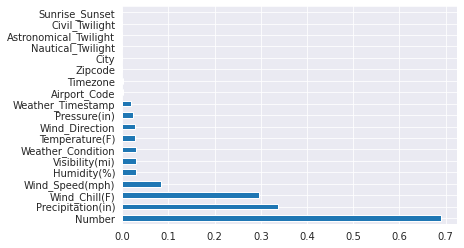

In [ ]:
Missing_percentages[Missing_percentages!= 0].plot(kind = 'barh')

Remove columns that you don't want to use

In [ ]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [ ]:
cities = df.City.unique()
len(cities)

10658

In [ ]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents

# Pandas value_counts returns an object containing counts of unique values in a pandas dataframe in sorted order.

Los Angeles      39984
Miami            36233
Charlotte        22203
Houston          20843
Dallas           19497
                 ...  
Stockertown          1
Omak                 1
Vilonia              1
Quaker Hill          1
Heber Springs        1
Name: City, Length: 10657, dtype: int64

In [ ]:
cities_by_accidents[0:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

In [ ]:
'New york ' in df.State

False

In [ ]:
'New york ' in df.City

False

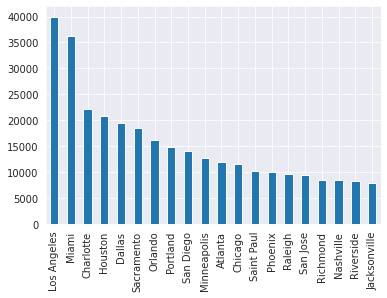

In [ ]:
cities_by_accidents[:20].plot(kind = 'bar')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

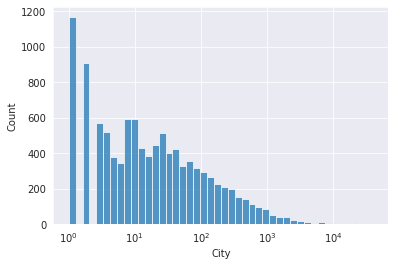

In [ ]:
sns.histplot(cities_by_accidents,log_scale=True)

In [ ]:
cities_by_accidents[cities_by_accidents ==1]

Graton           1
Lebo             1
Ranchester       1
Semora           1
Placida          1
                ..
Stockertown      1
Omak             1
Vilonia          1
Quaker Hill      1
Heber Springs    1
Name: City, Length: 1167, dtype: int64

### Start_Time

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [ ]:
df.Start_Time=pd.to_datetime(df.Start_Time)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


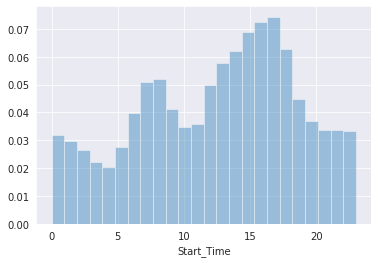

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


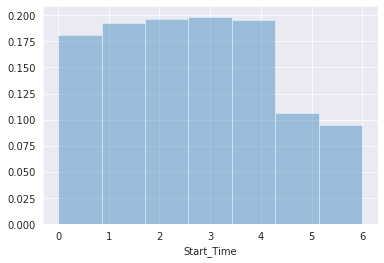

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist= True)

In [ ]:
df.Start_Time[df.Start_Time.dt.dayofweek == 6]

158       2016-02-14 03:58:33
159       2016-02-14 05:26:58
160       2016-02-14 16:30:40
161       2016-02-14 16:38:40
162       2016-02-14 17:40:17
                  ...        
1513810   2019-08-18 22:48:14
1513811   2019-08-18 23:24:10
1513925   2019-08-18 22:56:56
1513926   2019-08-18 22:56:56
1513965   2019-08-18 22:54:41
Name: Start_Time, Length: 123775, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


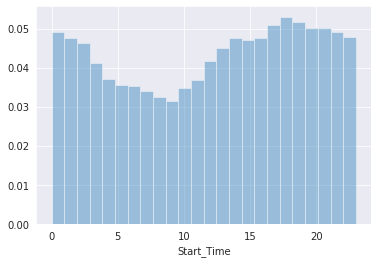

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins = 24, kde = False, norm_hist= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


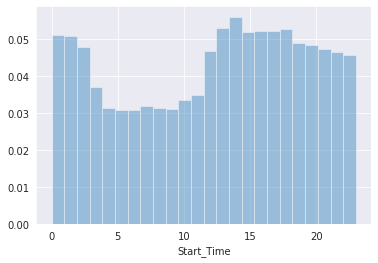

In [ ]:
saturdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.distplot(saturdays_start_time.dt.hour, bins = 24, kde = False, norm_hist= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


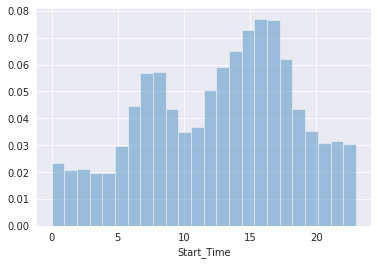

In [ ]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0 ]
sns.distplot(mondays_start_time.dt.hour, bins = 24, kde = False, norm_hist= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


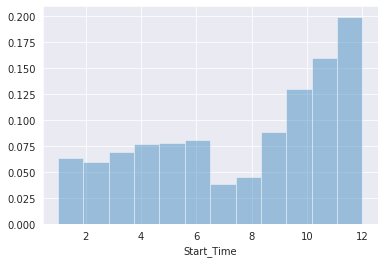

In [ ]:
sns.distplot(df.Start_Time.dt.month, bins = 12, kde = False, norm_hist= True)

can you explain the month wise trend of accidents?
-- Much data is missing from the year 2016 and 2017
-- There seems to be some issue with the bing data


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


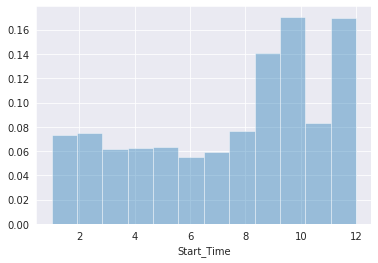

In [ ]:
df_2019 = df[df.Start_Time.dt.year ==2019]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False, norm_hist= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


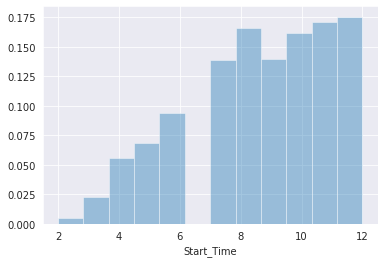

In [ ]:
df_2019 = df[df.Start_Time.dt.year ==2016]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False, norm_hist= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


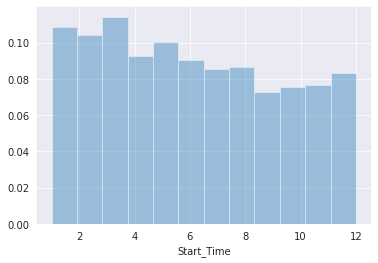

In [ ]:
df_2019 = df[df.Start_Time.dt.year ==2017]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False, norm_hist= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


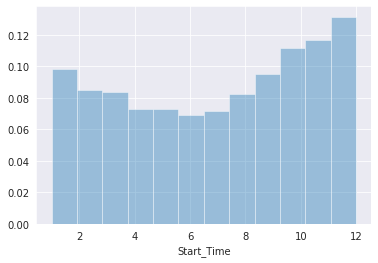

In [ ]:
df_2019 = df[df.Start_Time.dt.year ==2018]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False, norm_hist= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


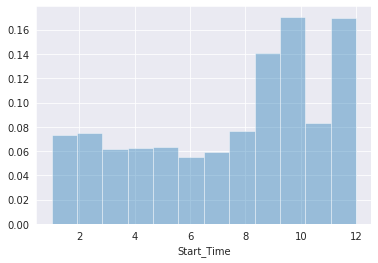

In [ ]:
df_2019 = df[df.Start_Time.dt.year ==2019]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False, norm_hist= True)

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Start Latitude & Start Longitude

In [ ]:
df.Start_Lat, df.Start_Lng

(0          40.10891
 1          39.86542
 2          39.10266
 3          39.10148
 4          41.06213
              ...   
 1516059    34.00248
 1516060    32.76696
 1516061    33.77545
 1516062    33.99246
 1516063    34.13393
 Name: Start_Lat, Length: 1516064, dtype: float64, 0          -83.09286
 1          -84.06280
 2          -84.52468
 3          -84.52341
 4          -81.53784
              ...    
 1516059   -117.37936
 1516060   -117.14806
 1516061   -117.84779
 1516062   -118.40302
 1516063   -117.23092
 Name: Start_Lng, Length: 1516064, dtype: float64)

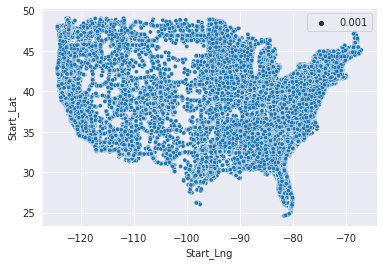

In [ ]:
sns.scatterplot(x =df.Start_Lng , y = df.Start_Lat, size = 0.001)

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

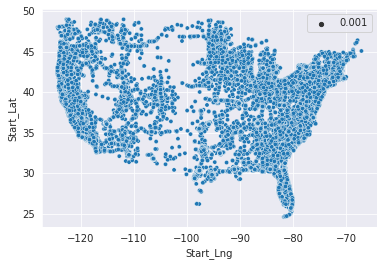

In [ ]:
sns.scatterplot(x =sample_df.Start_Lng , y = sample_df.Start_Lat, size = 0.001)

In [ ]:
import folium

In [ ]:
Lat , Lng = df.Start_Lat[0] , df.Start_Lng[0]
Lat , Lng

(40.108909999999995, -83.09286)

In [ ]:
for x in df[['Start_Lat','Start_Lng']].sample(100).iteritems():
  print(x[1])

1034899    44.645260
602279     47.477792
707229     25.925994
157062     39.090320
725115     35.420740
             ...    
1205373    45.975130
658906     39.524763
1269084    41.851340
1329440    33.588060
1271181    35.888930
Name: Start_Lat, Length: 100, dtype: float64
1034899    -93.295930
602279     -92.902954
707229     -80.157941
157062     -94.487280
725115     -97.539110
              ...    
1205373   -123.927670
658906    -122.213426
1269084    -87.668450
1329440    -84.508590
1271181   -120.046370
Name: Start_Lng, Length: 100, dtype: float64


In [ ]:
from folium.plugins import HeatMap

In [ ]:

Lat_Lng_pairs = list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(Lat_Lng_pairs).add_to(map)
map

# Ask and answer questuions

1. Are there more accidents in warmer or colder areas
2. Which five states have the highest number of accidents & per capita of states
3. Does New York show up in data? if yes why the count is lower - # Answered
4. Among the top 100 cities in number of accidents which states do they belong most frequently
5. What time of the day are more accidents happening frequently? - # Answered
6. Which days of the week have the most accidents
7. Which months have the most accidents
8. What is the trend of accidents year over year(decreasing/ increasing)
9. Is the distribution of accidents by hour the same on weekends as on weekdays

# Summary and conclusions

# Summary
- No data fom New York
- Less than 5% of cities have more than 1000 yearly accidents
- over 1200 cities have just repored 1 accident ( Need for investigation)
- The highest percentage of accidents happened between 6 to 10 in the morning(Probably people in hurry to get to work)
- The high percentage of accidents happened between 3 to 6 in the evening(Probably people in hurry to get back to home)
